<a href="https://colab.research.google.com/github/ishandahal/Fun_Projects/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastai -U

     |████████████████████████████████| 358kB 7.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [ ]:
(path / 'images').ls()

(#7393) [Path('images/american_bulldog_180.jpg'),Path('images/Abyssinian_13.jpg'),Path('images/yorkshire_terrier_183.jpg'),Path('images/chihuahua_13.jpg'),Path('images/scottish_terrier_71.jpg'),Path('images/British_Shorthair_126.jpg'),Path('images/basset_hound_135.jpg'),Path('images/saint_bernard_182.jpg'),Path('images/pug_149.jpg'),Path('images/english_cocker_spaniel_3.jpg')...]

In [ ]:
fname = (path / 'images').ls()[0]

In [ ]:
fname

Path('images/american_bulldog_180.jpg')

In [ ]:
re.findall(r"(\w+)_\d+.jpg$", fname.name)

['american_bulldog']

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 get_y=using_attr(RegexLabeller(r"(\w+)_.+g$"), 'name'),
                 splitter=RandomSplitter(),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path / 'images')

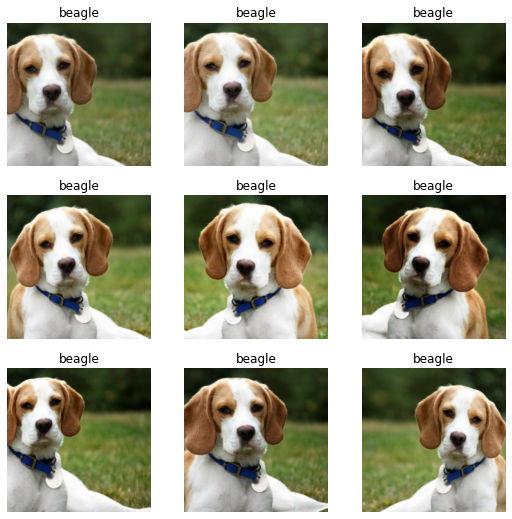

In [ ]:
dls.show_batch(unique=True)

In [ ]:
pets.summary(path)

Setting-up type transforms pipelines
Found 14780 items
2 datasets of sizes 11824,2956
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_142.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=333x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_142.jpg
    applying partial gives
      american_bulldog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(12)

Final sample: (PILImage mode=RGB size=333x500, TensorCategory(12))


Setting up after_item: Pipeline: Resize -- {'size': (460, 460), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch:

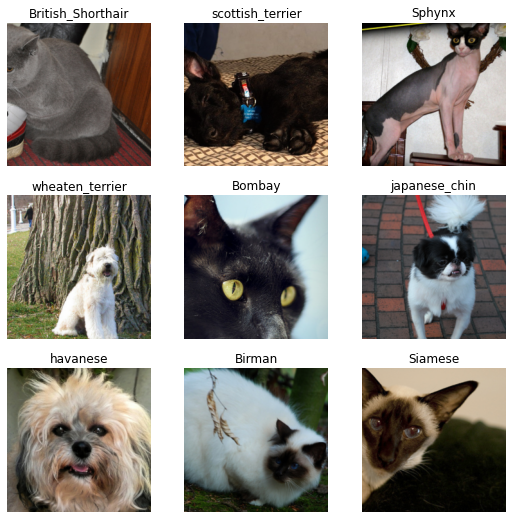

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.508240,0.331422,0.106901,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.516375,0.377998,0.117727,01:05
1,0.316211,0.214758,0.069012,01:05


In [ ]:
x,y = dls.one_batch()

In [ ]:
y

TensorCategory([ 8, 10, 24,  7, 24, 19,  4,  5, 12, 32, 19, 24, 35, 30, 34,  4,  9, 15,
         3,  5, 12, 17, 10, 15,  9, 29, 21,  1,  0,  3,  4,  4, 18, 36,  8, 22,
         6, 36,  8,  7, 12, 18,  4,  6,  8, 17, 11, 28,  7, 26, 33, 17, 25, 14,
        12, 14,  8, 12, 14,  1,  7, 13, 25,  3], device='cuda:0')

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([2.7493e-06, 5.1292e-07, 1.2541e-04, 4.4201e-06, 2.1912e-05, 1.8324e-06,
        1.6352e-04, 2.9721e-07, 9.9960e-01, 9.9267e-06, 2.9765e-06, 4.3434e-06,
        1.8064e-06, 7.2375e-08, 3.0161e-08, 1.1367e-07, 1.0606e-07, 8.4889e-07,
        1.7427e-07, 5.7078e-07, 7.0394e-07, 4.3390e-06, 1.1492e-06, 3.0597e-06,
        9.2133e-06, 8.3694e-07, 6.3580e-08, 1.3421e-07, 8.1572e-06, 3.1763e-07,
        2.4992e-06, 2.5132e-05, 2.4622e-07, 1.4083e-06, 5.9916e-07, 3.1536e-07,
        5.3679e-07])

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

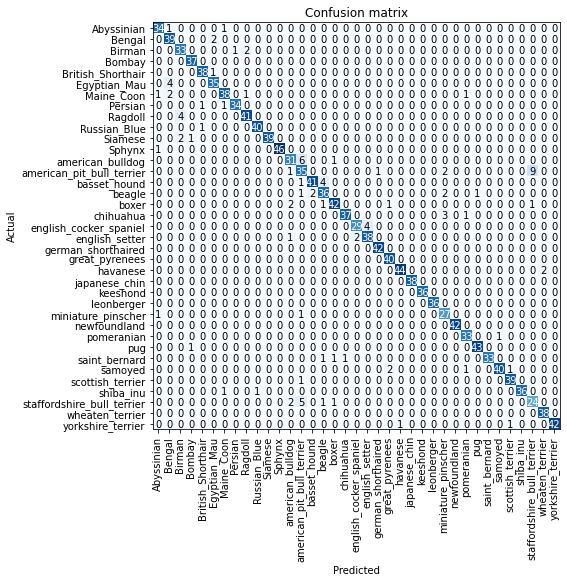

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8))

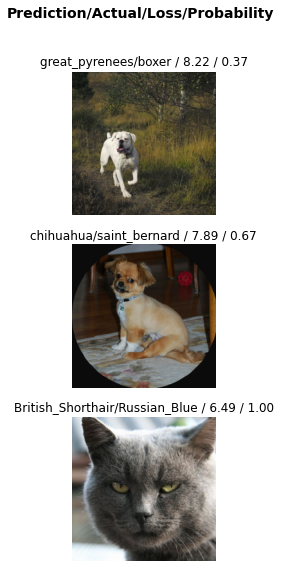

In [ ]:
interp.plot_top_losses(3, nrows=3)

In [ ]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('american_bulldog', 'american_pit_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.887520,7.907603,0.555480,01:03


epoch,train_loss,valid_loss,error_rate,time
0,3.753415,2.248307,0.642084,01:05


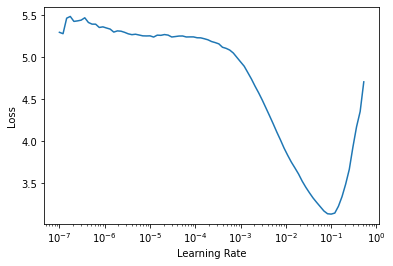

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 5.25e-03


In [ ]:
learn.fit_one_cycle(1, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.930197,2.465699,0.657645,01:04


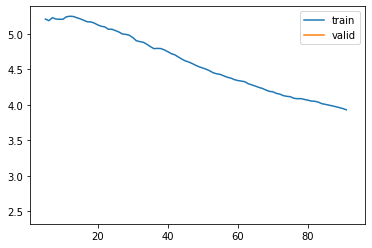

In [ ]:
learn.recorder.plot_loss()

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.431123,0.331330,0.115020,01:07
1,0.608782,0.332309,0.103518,01:07
2,0.409838,0.304647,0.094723,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.254796,0.266393,0.079838,01:10


In [ ]:
learn.recorder.plot_loss()